# INTRODUCTION

Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model.

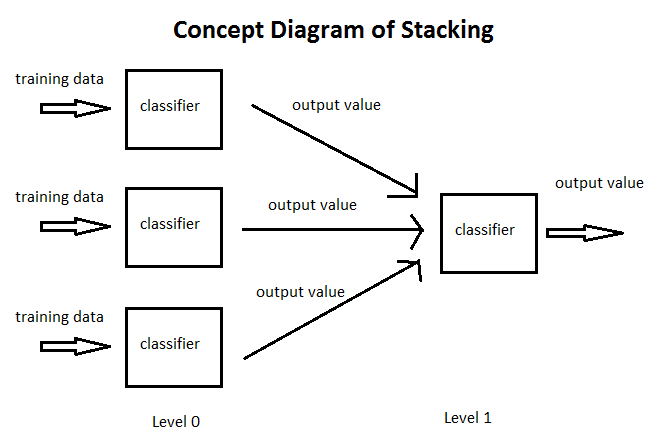

# Importing Libraries

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report

# Importing Dataset

In [2]:
data = pd.read_csv('Loan data cleaned.csv')

#printing the first few rows
data.head()

,loannumber,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,...,ploan_additional charges_50%_x,ploan_additional charges_75%_x,ploan_additional charges_max_x,ploan_additional charges_mean_y,ploan_additional charges_min_y,ploan_additional charges_25%_y,ploan_additional charges_50%_y,ploan_additional charges_75%_y,ploan_additional charges_max_y,not_repaid_percentage
0,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,...,3800.000000,4500.000000,4500.000000,3900.000000,3000.000000,3400.000000,3800.000000,4500.000000,4500.000000,64.000000
1,2,15000.0,17250.0,30,Good,Savings,3.885298,7.320700,GT Bank,Permanent,...,2665.558293,3037.525723,3543.851778,2730.359972,2102.661161,2364.738902,2665.558293,3037.525723,3543.851778,63.573297
2,7,20000.0,22250.0,15,Good,Other,11.139350,10.292041,EcoBank,Permanent,...,1500.000000,1500.000000,3000.000000,1750.000000,1500.000000,1500.000000,1500.000000,1500.000000,3000.000000,50.000000
3,3,10000.0,11500.0,15,Good,Savings,3.985770,7.491708,First Bank,Permanent,...,2250.000000,2625.000000,3000.000000,2250.000000,1500.000000,1875.000000,2250.000000,2625.000000,3000.000000,0.000000
4,9,40000.0,44000.0,30,Good,Other,7.457913,9.076574,GT Bank,Permanent,...,3800.000000,5100.000000,9000.000000,4800.000000,3000.000000,3000.000000,3800.000000,5100.000000,9000.000000,100.000000


In [3]:
#size of the data
data.shape

(4368, 64)

In [4]:
#checking missing values
data.isnull().sum()

loannumber                        0
loanamount                        0
totaldue                          0
termdays                          0
good_bad_flag                     0
                                 ..
ploan_additional charges_25%_y    0
ploan_additional charges_50%_y    0
ploan_additional charges_75%_y    0
ploan_additional charges_max_y    0
not_repaid_percentage             0
Length: 64, dtype: int64

In [5]:
#make dummies of categorical columns('bank_account_type','bank_name_clients','employment_status_clients')
data=pd.get_dummies(data=data,columns=['bank_account_type','bank_name_clients','employment_status_clients'],drop_first=True)

### Separating Dependent and Independent Variables

In [6]:
x = data.drop(['good_bad_flag'], axis=1)
y = data['good_bad_flag'].replace({'Good':0, 'Bad':1})

### Making test and training set

In [7]:
from sklearn.model_selection import train_test_split as tts

train_x, test_x, train_y, test_y = tts (x, y, random_state =50 , stratify = y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((3276, 80), (1092, 80), (3276,), (1092,))

**FEATURE SCALING**

In [8]:
#Scalig the train and testing datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
train_x = pd.DataFrame(train_x_scaled, columns=train_x.columns)

test_x_scaled = scaler.transform(test_x)
test_x = pd.DataFrame(test_x_scaled, columns=test_x.columns)

# Base models 

In [9]:
#importing predictive models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Training and Predictions 

In [10]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    
    #storing predictions for train
    pred_train=model.predict(train_x)
    #score on the training data
    score=f1_score(train_y,pred_train)
    print('\033[1m''Training Score:''\033[0m', score)
    
    #storing predictions for test
    pred_test=model.predict(test_x)
    #score on the training data
    score=f1_score(test_y,pred_test)
    print('\033[1m''Testing Score:''\033[0m', score)
    return pred_train, pred_test

--Model1(Logistic Regression)

In [11]:
#Model 1 - Logistic Regression
LR=LogisticRegression(random_state=50,class_weight='balanced')
M1_train, M1_test = model_predictions(LR, train_x, train_y, test_x)

Training Score: 0.4633165829145729
Testing Score: 0.476878612716763


--Model2(Decision Trees)

In [12]:
#Model 2 - Decision Tree
DT=DecisionTreeClassifier(criterion='gini',random_state=50,class_weight='balanced',max_depth=4,max_leaf_nodes=15,min_samples_split=30)
M2_train, M2_test = model_predictions(DT, train_x, train_y, test_x)

Training Score: 0.4760213143872114
Testing Score: 0.4680851063829787


--Model3(KNN)

In [13]:
#Model 3 - k Nearest Neighbour
knn=KNeighborsClassifier(n_neighbors=20)
M3_train, M3_test = model_predictions(knn, train_x, train_y, test_x)

Training Score: 0.20697954271961494
Testing Score: 0.16176470588235295


# Stacking Model

In [14]:
#Creating a New train dataframe
train_prediction = {
              'LR': M1_train,
              'DT': M2_train,
              'knn': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,LR,DT,knn
0,1,1,0
1,0,0,0
2,1,0,0
3,1,1,0
4,1,1,1


In [15]:
#Creating a New test dataframe
test_prediction = {
              'LR': M1_test,
              'DT': M2_test,
              'knn': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,LR,DT,knn
0,0,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [16]:
# Stacker Model
model1= LogisticRegression(class_weight='balanced',random_state=50)
model1.fit(train_predictions, train_y)
predict_test1=model1.predict(test_predictions)
predict_train1=model1.predict(train_predictions)
f1_training=f1_score(test_y,predict_test1)
f1_testing=f1_score(train_y,predict_train1)
print('\033[1m''Training Score:''\033[0m', f1_training)
print('\033[1m''Testing Score:''\033[0m', f1_testing)

Training Score: 0.46996466431095407
Testing Score: 0.4763593380614657


In [17]:
# Stacker Model
model2 =DecisionTreeClassifier(criterion='gini',random_state=50,class_weight='balanced',max_depth=4,max_leaf_nodes=15,min_samples_split=30)
model2.fit(train_predictions, train_y)
predict_test2=model2.predict(test_predictions)
predict_train2=model2.predict(train_predictions)
f1_training=f1_score(test_y,predict_test2)
f1_testing=f1_score(train_y,predict_train2)
print('\033[1m''Training Score:''\033[0m', f1_training)
print('\033[1m''Testing Score:''\033[0m', f1_testing)

Training Score: 0.46996466431095407
Testing Score: 0.4763593380614657


In [18]:
# Stacker Model
model3= KNeighborsClassifier(n_neighbors=20)
model3.fit(train_predictions, train_y)
predict_test3=model3.predict(test_predictions)
predict_train3=model3.predict(train_predictions)
f1_training=f1_score(test_y,predict_test3)
f1_testing=f1_score(train_y,predict_train3)
print('\033[1m''Training Score:''\033[0m', f1_training)
print('\033[1m''Testing Score:''\033[0m', f1_testing)

Training Score: 0.4883227176220806
Testing Score: 0.47938504542278126


**INFERENCE**

- Individually KNN score was 0.16 but with stacking it is giving 0.47 INDIVIDUALLY IT WAS A WEAK LEARNER

# PART 2

## Variants of Stacking#

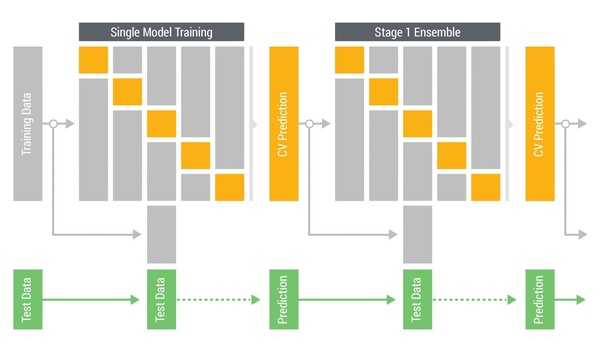

### Function that gives kfold predictions

In [19]:
from sklearn.model_selection import StratifiedKFold

def kfold_predictions( model , n_splits , train_x , train_y, test_x ):
    ## Initializing empty Numpy Arrays
    train_pred = np.empty((0,0) , int)
    skfold = StratifiedKFold(n_splits, random_state =50)
  
    #For every permutation of KFold
    for i,j in skfold.split(train_x, train_y):
        x_train, x_test = train_x.iloc[i], train_x.iloc[j]
        y_train, y_test = train_y.iloc[i], train_y.iloc[j]
    
        #Train a model on training set
        model.fit( X = x_train, y = y_train)
    
        #Predict on Chosen Group
        tmp = model.predict(x_test)
    
        #Storing train predictions
        train_pred = np.append(train_pred, tmp)
    
    #Training on complete data and generating Predictionson Test set
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
  
    return train_pred, test_pred

In [20]:
## Base Linear Regression model
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(class_weight='balanced',random_state=50)
M1_train, M1_test = kfold_predictions( LR, 10, train_x, train_y, test_x) 
#lr_train_pred.shape, lr_test_pred.shape, data_x.shape, data_y.shape

In [21]:
# Base Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',random_state=50,class_weight='balanced',max_depth=4,max_leaf_nodes=15,min_samples_split=30)
M2_train, M2_test = kfold_predictions(DT, 10, train_x, train_y, test_x) 
#dt_train_pred.shape, dt_test_pred.shape, data_x.shape, data_y.shapecriterion='gini',random_state=101,class_weight='balanced',max_depth=4,max_leaf_nodes=15,min_samples_split=30

In [22]:
# Base K-Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
M3_train, M3_test= kfold_predictions( knn, 10, train_x, train_y, test_x) 
#knn_train_pred.shape, knn_test_pred.shape, data_x.shape, data_y.shape

In [23]:
# Arranging Train KFold Predictions
train_prediction = {
              'LR': M1_train,
              'KNN': M3_train,
              'DT': M2_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,LR,KNN,DT
0,1,0,0
1,0,0,0
2,1,0,0
3,1,0,1
4,1,1,1


In [24]:
# Arranging test KFold Predictions
test_prediction = {
              'LR': M1_test,
              'KNN': M3_test,
              'DT': M2_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,LR,KNN,DT
0,0,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1


In [25]:
# Final Model taking the previous predictions as training set
model1= LogisticRegression(class_weight='balanced',random_state=101)
model1.fit(train_predictions, train_y)
final_train=model1.predict(train_predictions)
final_test= model1.predict(test_predictions)
print('\033[1m',"Classification Report for train data",'\033[0m')
print(classification_report(train_y, final_train))
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(test_y, final_test))

 Classification Report for train data 
              precision    recall  f1-score   support

           0       0.86      0.54      0.66      2562
           1       0.29      0.68      0.41       714

    accuracy                           0.57      3276
   macro avg       0.57      0.61      0.53      3276
weighted avg       0.73      0.57      0.60      3276

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       854
           1       0.33      0.76      0.46       238

    accuracy                           0.61      1092
   macro avg       0.61      0.67      0.58      1092
weighted avg       0.77      0.61      0.65      1092



In [26]:
# Final Model taking the previous predictions as training set
model3=DecisionTreeClassifier(criterion='gini',random_state=101,class_weight='balanced',max_depth=4,max_leaf_nodes=15,min_samples_split=30)
model3.fit(train_predictions, train_y)
final_train=model3.predict(train_predictions)
final_test= model3.predict(test_predictions)
print('\033[1m',"Classification Report for train data",'\033[0m')
print(classification_report(train_y, final_train))
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(test_y, final_test))

 Classification Report for train data 
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      2562
           1       0.39      0.43      0.41       714

    accuracy                           0.73      3276
   macro avg       0.61      0.62      0.61      3276
weighted avg       0.74      0.73      0.73      3276

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       854
           1       0.48      0.50      0.49       238

    accuracy                           0.77      1092
   macro avg       0.67      0.67      0.67      1092
weighted avg       0.78      0.77      0.77      1092



In [35]:
# Final Model taking the previous predictions as training set
model3= KNeighborsClassifier(n_neighbors=40)
model3.fit(train_predictions, train_y)
final_train=model3.predict(train_predictions)
final_test= model3.predict(test_predictions)
print('\033[1m',"Classification Report for train data",'\033[0m')
print(classification_report(train_y, final_train))
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(test_y, final_test))

 Classification Report for train data 
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2562
           1       0.52      0.15      0.24       714

    accuracy                           0.79      3276
   macro avg       0.66      0.56      0.56      3276
weighted avg       0.74      0.79      0.74      3276

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       854
           1       0.61      0.16      0.25       238

    accuracy                           0.79      1092
   macro avg       0.71      0.56      0.56      1092
weighted avg       0.76      0.79      0.74      1092



**INFERENCE**

with Kfold we can see even though scores are not really well but there is no overfitting or underfitting

we can use DT classifier as our meta classifier
